# The Adult Income dataset

### Description

Title of dataset: adult.csv

Sources:

    * Original owners of database - US Census Bureau
    * Donor of database - Ronny Kohavi and Barry Becker
    * Date received - 05/19/96 
    
Number of Instances

    * 48842 instances, mix of continuous and discrete (train=32561, test=16281)
    * 45222 if instances with unknown values are removed (train=30162, test=15060)
    * Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

Number of Attributes/Fearures/Columns

    * 6 continuous, 8 nominal attributes. 

Attribute Information/Fearures/Columns

    * age: continuous.
    * workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    * fnlwgt: continuous.
    * education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    * education-num: continuous.
    * marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    * occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
    * relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    * race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    * sex: Female, Male.
    * capital-gain: continuous.
    * capital-loss: continuous.
    * hours-per-week: continuous.
    * native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
    * income: >50K, <=50K 
    
Missing Values:
     
     7% rows have missing values. 
     


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
mis_val=['?']
data=pd.read_csv('adult.csv',na_values=mis_val)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [22]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [23]:
data.dropna(axis=0,how='any',inplace=True)
#now the dataset with no null value
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


From above it can be observed that approximately (48842-45222)/48842 * 100 =7.41% data is null data. So now the new data with no null values is having 45222 rows.

In [24]:
#basic analysis of the data(numeric)
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [25]:
#basic analysis of data(objects)
data.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,45222,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33307,14783,21055,6020,18666,38903,30527,41292,34014


In [26]:
#data preparation

In [27]:
#now removing the income column and unnecessary columns from the main dataset
data.drop('fnlwgt',axis=1,inplace=True)
data.drop('education',axis=1,inplace=True)
data.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [28]:
obj_data=data.select_dtypes(include='object')


from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first',sparse=False)
df_obj= pd.DataFrame(encoder.fit_transform(obj_data),columns=encoder.get_feature_names(obj_data.columns))
df_obj.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
num_data=data.select_dtypes(include=['int64','float64'])
num_data.reset_index(inplace=True)
num_data.shape

(45222, 6)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_num=pd.DataFrame(scaler.fit_transform(num_data),columns=num_data.columns)
type(df_num)
df_num.shape

(45222, 6)

In [31]:
joint_df=pd.concat([df_num,df_obj],axis=1)
joint_df.shape

(45222, 82)

In [32]:
y=joint_df.pop('income_>50K')
X=joint_df

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
#prediction
y_test_predict=classifier.predict(X_test)

accuracy: 0.8138129284292769


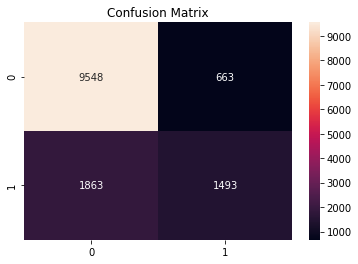

In [36]:
from sklearn import metrics
print('accuracy:',metrics.accuracy_score(y_test,y_test_predict))
#making confusion matrix
con_metric=metrics.confusion_matrix(y_test,y_test_predict)
con_metric
#making heatmap for confusion matrix
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [37]:
print(metrics.classification_report(y_test,y_test_predict))
#number of feature used = 81

              precision    recall  f1-score   support

           0       0.84      0.94      0.88     10211
           1       0.69      0.44      0.54      3356

    accuracy                           0.81     13567
   macro avg       0.76      0.69      0.71     13567
weighted avg       0.80      0.81      0.80     13567



## feature elimination using RFE

In [38]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
from sklearn.feature_selection import RFE
rfe=RFE(classifier,20)
rfe=rfe.fit(X_train,y_train)

imp_col=X_train.columns[rfe.support_]
print(imp_col)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Index(['educational-num', 'capital-gain', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'relationship_Other-relative',
       'relationship_Own-child', 'native-country_Columbia',
       'native-country_Dominican-Republic', 'native-country_El-Salvador',
       'native-country_France', 'native-country_Guatemala',
       'native-country_Mexico', 'native-country_Peru',
       'native-country_Scotland', 'native-country_Trinadad&Tobago',
       'native-country_Vietnam'],
      dtype='object')


In [39]:
X_train_new=X_train[imp_col]

from sklearn.linear_model import LogisticRegression
newclassifier=LogisticRegression()
newclassifier.fit(X_train_new,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
#prediction
X_test_new=X_test[imp_col]
y_test_predict_new=newclassifier.predict(X_test_new)

#measuring performance
#accuracy
from sklearn import metrics
print('accuracy:',metrics.accuracy_score(y_test,y_test_predict_new))

print(metrics.classification_report(y_test,y_test_predict_new))
#number of features used = 20

accuracy: 0.8385051964325201
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     10211
           1       0.74      0.54      0.62      3356

    accuracy                           0.84     13567
   macro avg       0.80      0.74      0.76     13567
weighted avg       0.83      0.84      0.83     13567



## Feature elimination using PCA

In [59]:
from sklearn.decomposition import PCA
pca_new=PCA(n_components = 17)
pca_new_data=pca_new.fit_transform(joint_df)

X_pca= pca_new_data

from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, train_size=0.7, random_state=100)

from sklearn.linear_model import LogisticRegression
pcaclassifier=LogisticRegression()
pcaclassifier.fit(X_train_pca,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
#prediction
y_test_predict_pca=pcaclassifier.predict(X_test_pca)

#measuring performance
#accuracy
from sklearn import metrics
print('accuracy:',metrics.accuracy_score(y_test,y_test_predict_pca))

print(metrics.classification_report(y_test,y_test_predict_pca))
#number of features used = 17

accuracy: 0.8447703987617012
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     10211
           1       0.74      0.58      0.65      3356

    accuracy                           0.84     13567
   macro avg       0.80      0.76      0.78     13567
weighted avg       0.84      0.84      0.84     13567



# Classification using K-nearest neighbour

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier=KNeighborsClassifier()
knnclassifier.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
#prediction
y_test_predict_knn=knnclassifier.predict(X_test)

#measuring performance
#accuracy
from sklearn import metrics
print('accuracy:',metrics.accuracy_score(y_test,y_test_predict_knn))

print(metrics.classification_report(y_test,y_test_predict_knn))
#number of features used = 89

accuracy: 0.7143804820520381
              precision    recall  f1-score   support

           0       0.76      0.92      0.83     10211
           1       0.28      0.10      0.14      3356

    accuracy                           0.71     13567
   macro avg       0.52      0.51      0.49     13567
weighted avg       0.64      0.71      0.66     13567



## Feature Elimination using PCA

In [49]:
from sklearn.neighbors import KNeighborsClassifier
pcaclassifier=KNeighborsClassifier()
pcaclassifier.fit(X_train_pca,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [58]:
#prediction
y_test_predict_pca=pcaclassifier.predict(X_test_pca)

#measuring performance
#accuracy
from sklearn import metrics
print('accuracy:',metrics.accuracy_score(y_test,y_test_predict_pca))

print(metrics.classification_report(y_test,y_test_predict_pca))
#number of features used = 17

accuracy: 0.8290705388074003
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     10211
           1       0.68      0.59      0.63      3356

    accuracy                           0.83     13567
   macro avg       0.77      0.75      0.76     13567
weighted avg       0.82      0.83      0.83     13567



# Classification using SVM

In [51]:
from sklearn.svm import SVC
svcclassifier=SVC()
svcclassifier.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
#prediction
y_test_predict_svc=svcclassifier.predict(X_test)

#measuring performance
#accuracy
from sklearn import metrics
print('accuracy:',metrics.accuracy_score(y_test,y_test_predict_svc))

print('Classification Report:\n')
print(metrics.classification_report(y_test,y_test_predict_svc))
#number of features used = 89

accuracy: 0.7526350703913909
Classification Report:

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     10211
           1       0.00      0.00      0.00      3356

    accuracy                           0.75     13567
   macro avg       0.38      0.50      0.43     13567
weighted avg       0.57      0.75      0.65     13567



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Classification using Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier=DecisionTreeClassifier(max_depth=2)
dtclassifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
#prediction
y_test_predict_dt=dtclassifier.predict(X_test)

#measuring performance
#accuracy
from sklearn import metrics
print('accuracy:',metrics.accuracy_score(y_test,y_test_predict_dt))

print('Classification Report for Decision Tree:\n')
print(metrics.classification_report(y_test,y_test_predict_dt))
#number of features used = 89

accuracy: 0.8253851256725879
Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     10211
           1       0.75      0.44      0.56      3356

    accuracy                           0.83     13567
   macro avg       0.79      0.70      0.72     13567
weighted avg       0.82      0.83      0.81     13567



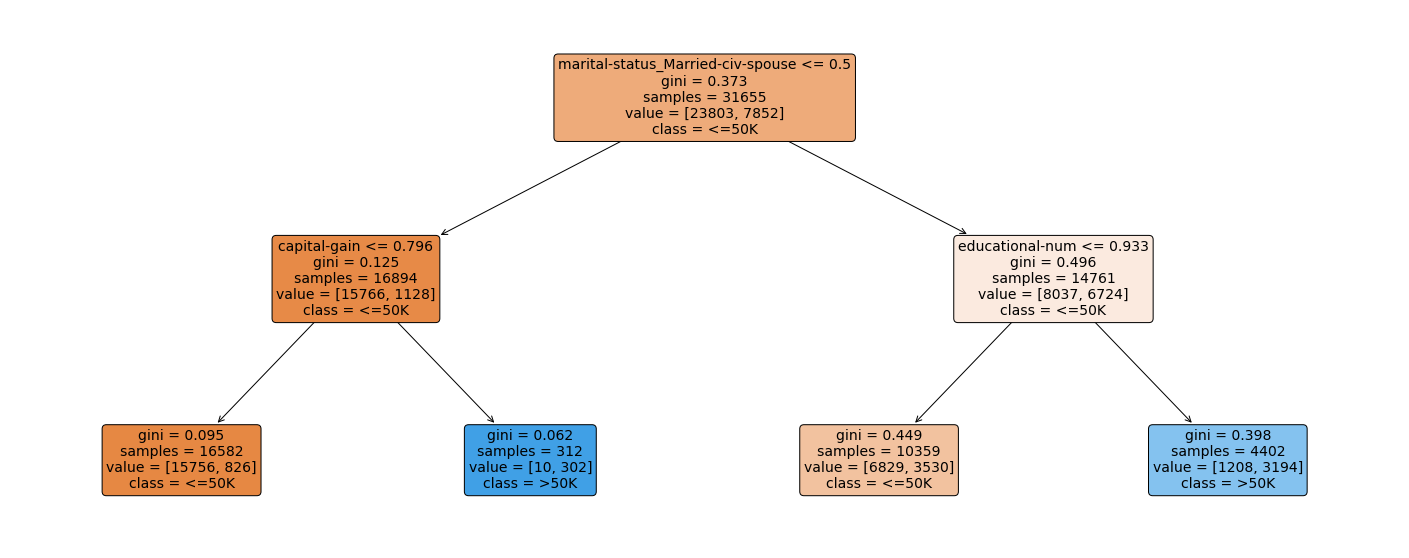

In [55]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
f = plot_tree(dtclassifier,feature_names=X_train.columns,class_names=['<=50K','>50K'],filled=True, rounded=True, fontsize=14)

## Feature Elimination Using PCA

In [65]:
from sklearn.tree import DecisionTreeClassifier
pca_dtclassifier=DecisionTreeClassifier(max_depth=2)
pca_dtclassifier.fit(X_train_pca,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [66]:
#prediction
y_test_predict_pca=pca_dtclassifier.predict(X_test_pca)

#measuring performance
#accuracy
from sklearn import metrics
print('accuracy:',metrics.accuracy_score(y_test,y_test_predict_pca))

print(metrics.classification_report(y_test,y_test_predict_pca))
#number of features used = 17

accuracy: 0.8096115574555908
              precision    recall  f1-score   support

           0       0.88      0.87      0.87     10211
           1       0.61      0.63      0.62      3356

    accuracy                           0.81     13567
   macro avg       0.74      0.75      0.75     13567
weighted avg       0.81      0.81      0.81     13567

